I noticed some significant discrepancies between the derivatives of $P_0$, $P_2$, and $B_0$ w.r.t the parameters, in particular $\Omega_b$ and $M_\nu$. In this notebook I compare the dervatives and the observables for the different RSD directions. 
- There are some discrepancies between $P_\ell$ for the different RSD values, which cause the derivatives to be significantly different. However for $P_\ell$ themselves, these are subpercent level discrepancies.

This notebook revealed a bug: 
- the bispectrum measurements for the 3 different RSD angles are identical for all the parameters except fiducial_za and 61 realizations of fiducial. Not sure what happened for the 61...

In [1]:
import os
import numpy as np 
# --- eMaNu --- 
from emanu import util as UT
from emanu import obvs as Obvs
from emanu import forecast as Forecast
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
from matplotlib.colors import LogNorm

In [3]:
dP0dOb_rsd, dP2dOb_rsd, dB0dOb_rsd = [], [], []
dP0dMnu_rsd, dP2dMnu_rsd, dB0dMnu_rsd = [], [], [] 

for rsd in [0, 1, 2]:  
    print("--- RSD %i ---" % rsd)
    # dP0/dtheta, dP2/dtheta
    k, dp_Ob = Forecast.quijhod_dP02kdtheta('Ob2', log=False, z=0, rsd=rsd, flag='reg', dmnu='fin', silent=False)
    _, dp_Mnu = Forecast.quijhod_dP02kdtheta('Mnu', log=False, z=0, rsd=rsd, flag='reg', dmnu='fin', silent=False)
    dP0dOb_rsd.append(dp_Ob[:int(len(k)/2)])
    dP2dOb_rsd.append(dp_Ob[int(len(k)/2):])
    dP0dMnu_rsd.append(dp_Mnu[:int(len(k)/2)])
    dP2dMnu_rsd.append(dp_Mnu[int(len(k)/2):])
    
    # dB0/dtheta
    i_k, j_k, l_k, db_Ob = Forecast.quijhod_dBkdtheta('Ob2', log=False, z=0, rsd=rsd, flag='reg', dmnu='fin', silent=False)
    _, _, _, db_Mnu = Forecast.quijhod_dBkdtheta('Mnu', log=False, z=0, rsd=rsd, flag='reg', dmnu='fin', silent=False)
    dB0dOb_rsd.append(db_Ob)
    dB0dMnu_rsd.append(db_Mnu)

--- RSD 0 ---
--- calculating dP/dOb2 ---
['quijhod_Ob2_m.reg.rsd0.hdf5']
['quijhod_Ob2_p.reg.rsd0.hdf5']
--- calculating dP/dMnu using fin ---
['quijhod_fiducial_za.reg.rsd0.hdf5']
['quijhod_Mnu_p.reg.rsd0.hdf5']
['quijhod_Mnu_pp.reg.rsd0.hdf5']
['quijhod_Mnu_ppp.reg.rsd0.hdf5']
--- calculating dB/dOb2 ---
['quijhod_Ob2_m.reg.rsd0.hdf5']
['quijhod_Ob2_p.reg.rsd0.hdf5']
--- calculating dB/dMnu using fin ---
['quijhod_fiducial_za.reg.rsd0.hdf5']
['quijhod_Mnu_p.reg.rsd0.hdf5']
['quijhod_Mnu_pp.reg.rsd0.hdf5']
['quijhod_Mnu_ppp.reg.rsd0.hdf5']
--- RSD 1 ---
--- calculating dP/dOb2 ---
['quijhod_Ob2_m.reg.rsd1.hdf5']
['quijhod_Ob2_p.reg.rsd1.hdf5']
--- calculating dP/dMnu using fin ---
['quijhod_fiducial_za.reg.rsd1.hdf5']
['quijhod_Mnu_p.reg.rsd1.hdf5']
['quijhod_Mnu_pp.reg.rsd1.hdf5']
['quijhod_Mnu_ppp.reg.rsd1.hdf5']
--- calculating dB/dOb2 ---
['quijhod_Ob2_m.reg.rsd1.hdf5']
['quijhod_Ob2_p.reg.rsd1.hdf5']
--- calculating dB/dMnu using fin ---
['quijhod_fiducial_za.reg.rsd1.hdf5']
['q

impose $k$-limits 

In [5]:
kf = 2.*np.pi/1000. # fundmaentla mode
k_p = k[:int(len(k)/2)]

pklim = (k_p < 0.5)
bklim = ((i_k * kf < 0.5) & (j_k * kf < 0.5) & (l_k * kf < 0.5))

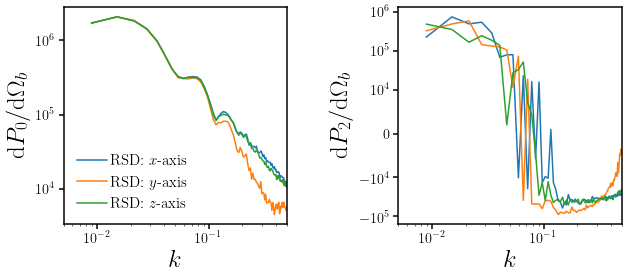

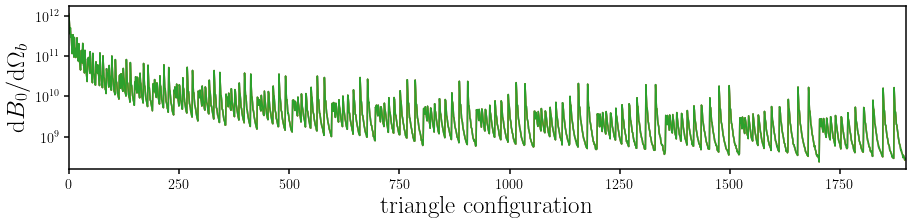

In [35]:
fig0 = plt.figure(figsize=(10,4))
fig0.subplots_adjust(wspace=0.5)
fig1 = plt.figure(figsize=(15,3))
sub0 = fig0.add_subplot(121)
sub1 = fig0.add_subplot(122)
sub2 = fig1.add_subplot(111)

for rsd in [0, 1, 2]: 
    sub0.plot(k_p[pklim], dP0dOb_rsd[rsd][pklim], c='C%i' % rsd, label='RSD: $%s$-axis' % ['x', 'y', 'z'][rsd])
    sub1.plot(k_p[pklim], dP2dOb_rsd[rsd][pklim], c='C%i' % rsd)
    sub2.plot(range(np.sum(bklim)), dB0dOb_rsd[rsd][bklim], c='C%i' % rsd)

sub0.legend(loc='lower left', handletextpad=0.2, fontsize=15)
sub0.set_xlabel('$k$', fontsize=25)
sub0.set_xscale('log') 
sub0.set_xlim(5e-3, 0.5)
sub0.set_ylabel(r'${\rm d} P_0/{\rm d} \Omega_b$', fontsize=25)
sub0.set_yscale('symlog')

sub1.set_xlabel('$k$', fontsize=25)
sub1.set_xscale('log') 
sub1.set_xlim(5e-3, 0.5) 
sub1.set_ylabel(r'${\rm d} P_2/{\rm d} \Omega_b$', fontsize=25)
sub1.set_yscale('symlog', linthreshy=1e4)

sub2.set_xlabel("triangle configuration", fontsize=25)
sub2.set_xlim(0, np.sum(bklim))
sub2.set_ylabel(r'${\rm d} B_0/{\rm d} \Omega_b$', fontsize=25)
sub2.set_yscale('symlog')

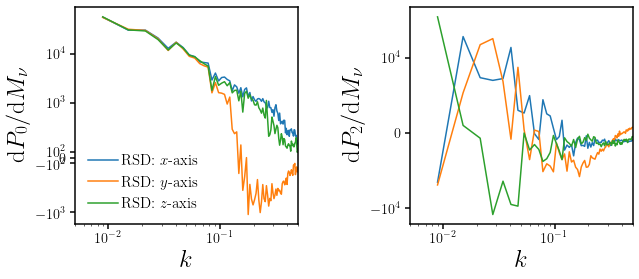

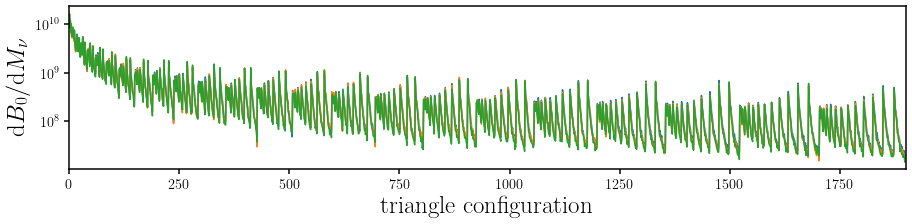

In [36]:
fig0 = plt.figure(figsize=(10,4))
fig0.subplots_adjust(wspace=0.5)
fig1 = plt.figure(figsize=(15,3))
sub0 = fig0.add_subplot(121)
sub1 = fig0.add_subplot(122)
sub2 = fig1.add_subplot(111)

for rsd in [0, 1, 2]: 
    sub0.plot(k_p[pklim], dP0dMnu_rsd[rsd][pklim], c='C%i' % rsd, label='RSD: $%s$-axis' % ['x', 'y', 'z'][rsd])
    sub1.plot(k_p[pklim], dP2dMnu_rsd[rsd][pklim], c='C%i' % rsd)
    sub2.plot(range(np.sum(bklim)), dB0dMnu_rsd[rsd][bklim], c='C%i' % rsd)

sub0.legend(loc='lower left', handletextpad=0.2, fontsize=15)
sub0.set_xlabel('$k$', fontsize=25)
sub0.set_xscale('log') 
sub0.set_xlim(5e-3, 0.5)
sub0.set_ylabel(r'${\rm d} P_0/{\rm d} M_\nu$', fontsize=25)
sub0.set_yscale('symlog', linthreshy=1e3)

sub1.set_xlabel('$k$', fontsize=25)
sub1.set_xscale('log') 
sub1.set_xlim(5e-3, 0.5) 
sub1.set_ylabel(r'${\rm d} P_2/{\rm d} M_\nu$', fontsize=25)
sub1.set_yscale('symlog', linthreshy=1e4)

sub2.set_xlabel("triangle configuration", fontsize=25)
sub2.set_xlim(0, np.sum(bklim))
sub2.set_ylabel(r'${\rm d} B_0/{\rm d} M_\nu$', fontsize=25)
sub2.set_yscale('symlog')

In [57]:
P0_Ob_m_rsd, P2_Ob_m_rsd, B0_Ob_m_rsd = [], [], []
P0_Ob_p_rsd, P2_Ob_p_rsd, B0_Ob_p_rsd = [], [], []

P0_Mnu_0_rsd, P2_Mnu_0_rsd, B0_Mnu_0_rsd = [], [], []
P0_Mnu_p_rsd, P2_Mnu_p_rsd, B0_Mnu_p_rsd = [], [], []

for rsd in [0, 1, 2]:  
    # read in P0g, P2g, and Bg for Ob2_m
    qhod_p = Obvs.quijhod_Pk('Ob2_m', flag='reg', rsd=rsd, silent=False) 
    qhod_b = Obvs.quijhod_Bk('Ob2_m', flag='reg', rsd=rsd, silent=False) 
    p0g, p2g = np.average(qhod_p['p0k'], axis=0), np.average(qhod_p['p2k'], axis=0)
    b0g = np.average(qhod_b['b123'], axis=0) 

    P0_Ob_m_rsd.append(p0g)
    P2_Ob_m_rsd.append(p2g)
    B0_Ob_m_rsd.append(b0g)

    # read in P0g, P2g, and Bg for Ob2_p
    qhod_p = Obvs.quijhod_Pk('Ob2_p', flag='reg', rsd=rsd, silent=False) 
    qhod_b = Obvs.quijhod_Bk('Ob2_p', flag='reg', rsd=rsd, silent=False) 
    p0g, p2g = np.average(qhod_p['p0k'], axis=0), np.average(qhod_p['p2k'], axis=0)
    b0g = np.average(qhod_b['b123'], axis=0) 

    P0_Ob_p_rsd.append(p0g)
    P2_Ob_p_rsd.append(p2g)
    B0_Ob_p_rsd.append(b0g)
    
    # read in P0g, P2g, and Bg for Mnu_m
    qhod_p = Obvs.quijhod_Pk('fiducial_za', flag='reg', rsd=rsd, silent=False) 
    qhod_b = Obvs.quijhod_Bk('fiducial_za', flag='reg', rsd=rsd, silent=False) 
    p0g, p2g = np.average(qhod_p['p0k'], axis=0), np.average(qhod_p['p2k'], axis=0)
    b0g = np.average(qhod_b['b123'], axis=0) 

    P0_Mnu_0_rsd.append(p0g)
    P2_Mnu_0_rsd.append(p2g)
    B0_Mnu_0_rsd.append(b0g)
    
    # read in P0g, P2g, and Bg for Mnu_p
    qhod_p = Obvs.quijhod_Pk('Mnu_p', flag='reg', rsd=rsd, silent=False) 
    qhod_b = Obvs.quijhod_Bk('Mnu_p', flag='reg', rsd=rsd, silent=False) 
    p0g, p2g = np.average(qhod_p['p0k'], axis=0), np.average(qhod_p['p2k'], axis=0)
    b0g = np.average(qhod_b['b123'], axis=0) 

    P0_Mnu_p_rsd.append(p0g)
    P2_Mnu_p_rsd.append(p2g)
    B0_Mnu_p_rsd.append(b0g)

['quijhod_Ob2_m.reg.rsd0.hdf5']
['quijhod_Ob2_m.reg.rsd0.hdf5']
['quijhod_Ob2_p.reg.rsd0.hdf5']
['quijhod_Ob2_p.reg.rsd0.hdf5']
['quijhod_fiducial_za.reg.rsd0.hdf5']
['quijhod_fiducial_za.reg.rsd0.hdf5']
['quijhod_Mnu_p.reg.rsd0.hdf5']
['quijhod_Mnu_p.reg.rsd0.hdf5']
['quijhod_Ob2_m.reg.rsd1.hdf5']
['quijhod_Ob2_m.reg.rsd1.hdf5']
['quijhod_Ob2_p.reg.rsd1.hdf5']
['quijhod_Ob2_p.reg.rsd1.hdf5']
['quijhod_fiducial_za.reg.rsd1.hdf5']
['quijhod_fiducial_za.reg.rsd1.hdf5']
['quijhod_Mnu_p.reg.rsd1.hdf5']
['quijhod_Mnu_p.reg.rsd1.hdf5']
['quijhod_Ob2_m.reg.rsd2.hdf5']
['quijhod_Ob2_m.reg.rsd2.hdf5']
['quijhod_Ob2_p.reg.rsd2.hdf5']
['quijhod_Ob2_p.reg.rsd2.hdf5']
['quijhod_fiducial_za.reg.rsd2.hdf5']
['quijhod_fiducial_za.reg.rsd2.hdf5']
['quijhod_Mnu_p.reg.rsd2.hdf5']
['quijhod_Mnu_p.reg.rsd2.hdf5']


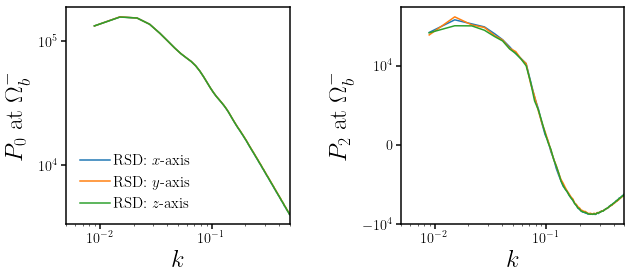

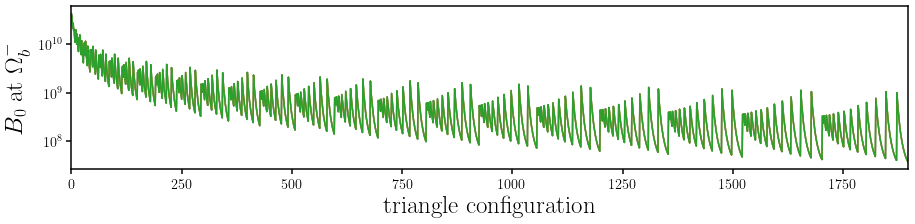

In [41]:
fig0 = plt.figure(figsize=(10,4))
fig0.subplots_adjust(wspace=0.5)
fig1 = plt.figure(figsize=(15,3))
sub0 = fig0.add_subplot(121)
sub1 = fig0.add_subplot(122)
sub2 = fig1.add_subplot(111)

for rsd in [0, 1, 2]: 
    sub0.plot(k_p[pklim], P0_Ob_m_rsd[rsd][pklim], c='C%i' % rsd, label='RSD: $%s$-axis' % ['x', 'y', 'z'][rsd])
    sub1.plot(k_p[pklim], P2_Ob_m_rsd[rsd][pklim], c='C%i' % rsd)
    sub2.plot(range(np.sum(bklim)), B0_Ob_m_rsd[rsd][bklim], c='C%i' % rsd)

sub0.legend(loc='lower left', handletextpad=0.2, fontsize=15)
sub0.set_xlabel('$k$', fontsize=25)
sub0.set_xscale('log') 
sub0.set_xlim(5e-3, 0.5)
sub0.set_ylabel(r'$P_0$ at $\Omega_b^-$', fontsize=25)
sub0.set_yscale('symlog', linthreshy=1e3)

sub1.set_xlabel('$k$', fontsize=25)
sub1.set_xscale('log') 
sub1.set_xlim(5e-3, 0.5) 
sub1.set_ylabel(r'$P_2$ at $\Omega_b^-$', fontsize=25)
sub1.set_yscale('symlog', linthreshy=1e4)

sub2.set_xlabel("triangle configuration", fontsize=25)
sub2.set_xlim(0, np.sum(bklim))
sub2.set_ylabel(r'$B_0$ at $\Omega_b^-$', fontsize=25)
sub2.set_yscale('symlog')

Text(0, 0.5, '$B_{0,\\_}/B_{0,z}$ at $\\Omega_b^-$')

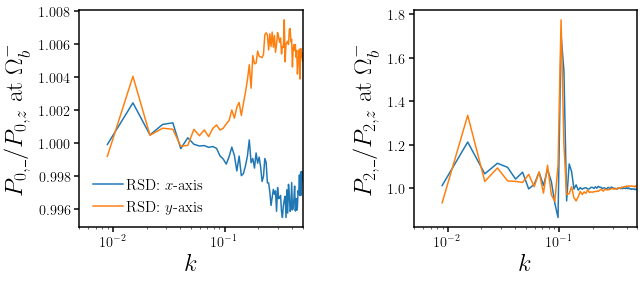

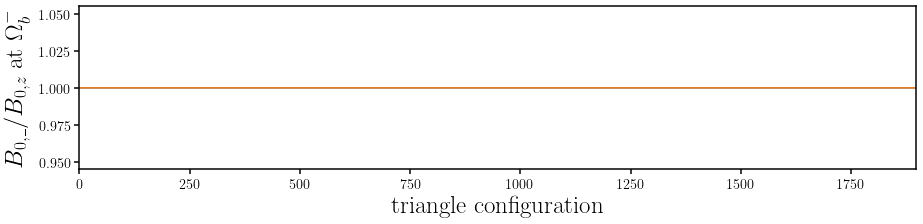

In [54]:
fig0 = plt.figure(figsize=(10,4))
fig0.subplots_adjust(wspace=0.5)
fig1 = plt.figure(figsize=(15,3))
sub0 = fig0.add_subplot(121)
sub1 = fig0.add_subplot(122)
sub2 = fig1.add_subplot(111)

for rsd in [0, 1]: 
    sub0.plot(k_p[pklim], P0_Ob_m_rsd[rsd][pklim]/P0_Ob_m_rsd[2][pklim], c='C%i' % rsd, label='RSD: $%s$-axis' % ['x', 'y', 'z'][rsd])
    sub1.plot(k_p[pklim], P2_Ob_m_rsd[rsd][pklim]/P2_Ob_m_rsd[2][pklim], c='C%i' % rsd)
    sub2.plot(range(np.sum(bklim)), B0_Ob_m_rsd[rsd][bklim]/B0_Ob_m_rsd[2][bklim], c='C%i' % rsd)

sub0.legend(loc='lower left', handletextpad=0.2, fontsize=15)
sub0.set_xlabel('$k$', fontsize=25)
sub0.set_xscale('log') 
sub0.set_xlim(5e-3, 0.5)
sub0.set_ylabel(r'$P_{0,\_}/P_{0,z}$ at $\Omega_b^-$', fontsize=25)

sub1.set_xlabel('$k$', fontsize=25)
sub1.set_xscale('log') 
sub1.set_xlim(5e-3, 0.5) 
sub1.set_ylabel(r'$P_{2,\_}/P_{2,z}$ at $\Omega_b^-$', fontsize=25)

sub2.set_xlabel("triangle configuration", fontsize=25)
sub2.set_xlim(0, np.sum(bklim))
sub2.set_ylabel(r'$B_{0,\_}/B_{0,z}$ at $\Omega_b^-$', fontsize=25)


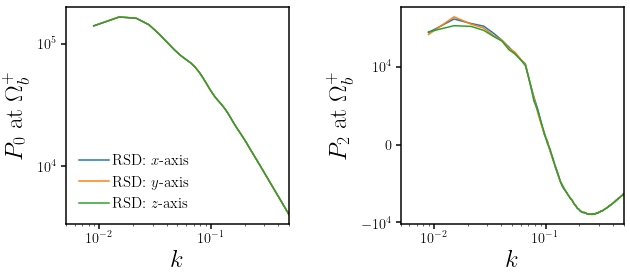

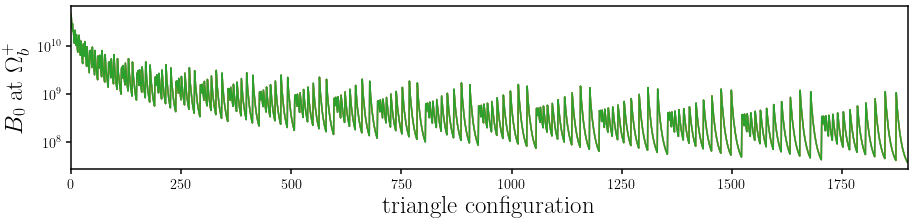

In [42]:
fig0 = plt.figure(figsize=(10,4))
fig0.subplots_adjust(wspace=0.5)
fig1 = plt.figure(figsize=(15,3))
sub0 = fig0.add_subplot(121)
sub1 = fig0.add_subplot(122)
sub2 = fig1.add_subplot(111)

for rsd in [0, 1, 2]: 
    sub0.plot(k_p[pklim], P0_Ob_p_rsd[rsd][pklim], c='C%i' % rsd, label='RSD: $%s$-axis' % ['x', 'y', 'z'][rsd])
    sub1.plot(k_p[pklim], P2_Ob_p_rsd[rsd][pklim], c='C%i' % rsd)
    sub2.plot(range(np.sum(bklim)), B0_Ob_p_rsd[rsd][bklim], c='C%i' % rsd)

sub0.legend(loc='lower left', handletextpad=0.2, fontsize=15)
sub0.set_xlabel('$k$', fontsize=25)
sub0.set_xscale('log') 
sub0.set_xlim(5e-3, 0.5)
sub0.set_ylabel(r'$P_0$ at $\Omega_b^+$', fontsize=25)
sub0.set_yscale('symlog', linthreshy=1e3)

sub1.set_xlabel('$k$', fontsize=25)
sub1.set_xscale('log') 
sub1.set_xlim(5e-3, 0.5) 
sub1.set_ylabel(r'$P_2$ at $\Omega_b^+$', fontsize=25)
sub1.set_yscale('symlog', linthreshy=1e4)

sub2.set_xlabel("triangle configuration", fontsize=25)
sub2.set_xlim(0, np.sum(bklim))
sub2.set_ylabel(r'$B_0$ at $\Omega_b^+$', fontsize=25)
sub2.set_yscale('symlog')

Text(0, 0.5, '$B_{0,\\_}/B_{0,z}$ at $\\Omega_b^+$')

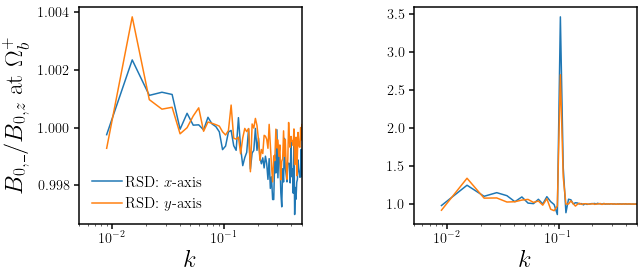

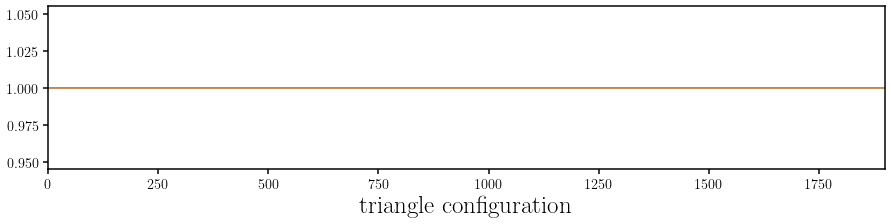

In [55]:
fig0 = plt.figure(figsize=(10,4))
fig0.subplots_adjust(wspace=0.5)
fig1 = plt.figure(figsize=(15,3))
sub0 = fig0.add_subplot(121)
sub1 = fig0.add_subplot(122)
sub2 = fig1.add_subplot(111)

for rsd in [0, 1]: 
    sub0.plot(k_p[pklim], P0_Ob_p_rsd[rsd][pklim]/P0_Ob_p_rsd[2][pklim], c='C%i' % rsd, label='RSD: $%s$-axis' % ['x', 'y', 'z'][rsd])
    sub1.plot(k_p[pklim], P2_Ob_p_rsd[rsd][pklim]/P2_Ob_p_rsd[2][pklim], c='C%i' % rsd)
    sub2.plot(range(np.sum(bklim)), B0_Ob_m_rsd[rsd][bklim]/B0_Ob_m_rsd[2][bklim], c='C%i' % rsd)

sub0.legend(loc='lower left', handletextpad=0.2, fontsize=15)
sub0.set_xlabel('$k$', fontsize=25)
sub0.set_xscale('log') 
sub0.set_xlim(5e-3, 0.5)
sub0.set_ylabel(r'$P_{0,\_}/P_{0,z}$ at $\Omega_b^+$', fontsize=25)

sub1.set_xlabel('$k$', fontsize=25)
sub1.set_xscale('log') 
sub1.set_xlim(5e-3, 0.5) 
sub0.set_ylabel(r'$P_{2,\_}/P_{2,z}$ at $\Omega_b^+$', fontsize=25)

sub2.set_xlabel("triangle configuration", fontsize=25)
sub2.set_xlim(0, np.sum(bklim))
sub0.set_ylabel(r'$B_{0,\_}/B_{0,z}$ at $\Omega_b^+$', fontsize=25)

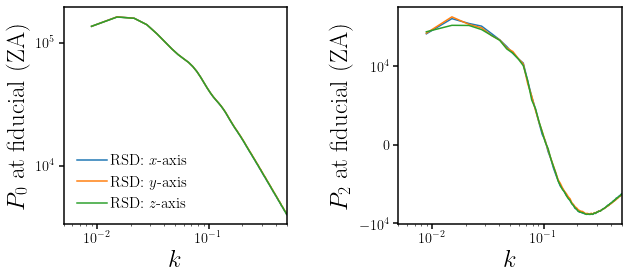

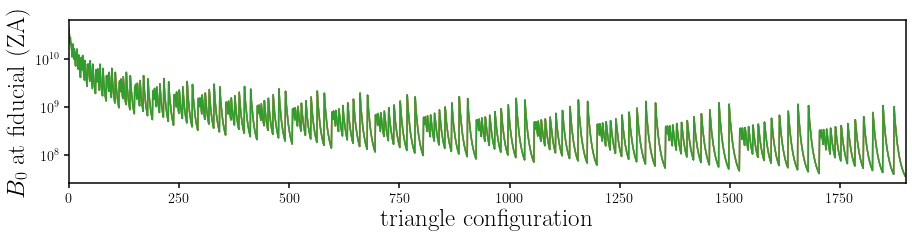

In [58]:
fig0 = plt.figure(figsize=(10,4))
fig0.subplots_adjust(wspace=0.5)
fig1 = plt.figure(figsize=(15,3))
sub0 = fig0.add_subplot(121)
sub1 = fig0.add_subplot(122)
sub2 = fig1.add_subplot(111)

for rsd in [0, 1, 2]: 
    sub0.plot(k_p[pklim], P0_Mnu_0_rsd[rsd][pklim], c='C%i' % rsd, label='RSD: $%s$-axis' % ['x', 'y', 'z'][rsd])
    sub1.plot(k_p[pklim], P2_Mnu_0_rsd[rsd][pklim], c='C%i' % rsd)
    sub2.plot(range(np.sum(bklim)), B0_Mnu_0_rsd[rsd][bklim], c='C%i' % rsd)

sub0.legend(loc='lower left', handletextpad=0.2, fontsize=15)
sub0.set_xlabel('$k$', fontsize=25)
sub0.set_xscale('log') 
sub0.set_xlim(5e-3, 0.5)
sub0.set_ylabel(r'$P_0$ at fiducial (ZA)', fontsize=25)
sub0.set_yscale('symlog', linthreshy=1e3)

sub1.set_xlabel('$k$', fontsize=25)
sub1.set_xscale('log') 
sub1.set_xlim(5e-3, 0.5) 
sub1.set_ylabel(r'$P_2$ at fiducial (ZA)', fontsize=25)
sub1.set_yscale('symlog', linthreshy=1e4)

sub2.set_xlabel("triangle configuration", fontsize=25)
sub2.set_xlim(0, np.sum(bklim))
sub2.set_ylabel(r'$B_0$ at fiducial (ZA)', fontsize=25)
sub2.set_yscale('symlog')

Text(0, 0.5, '$B_{0,\\_}/B_{0,z}$ at fiducial (ZA)')

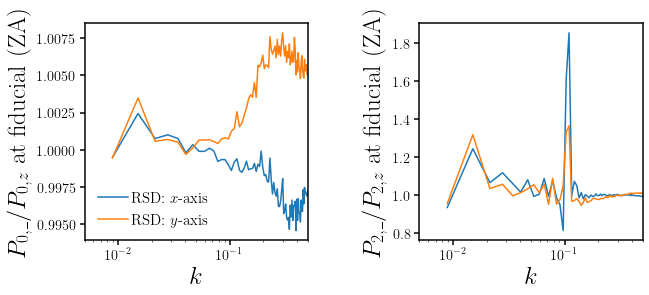

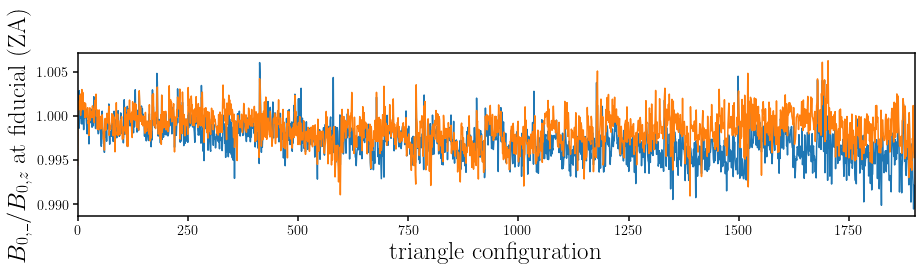

In [62]:
fig0 = plt.figure(figsize=(10,4))
fig0.subplots_adjust(wspace=0.5)
fig1 = plt.figure(figsize=(15,3))
sub0 = fig0.add_subplot(121)
sub1 = fig0.add_subplot(122)
sub2 = fig1.add_subplot(111)

for rsd in [0, 1]: 
    sub0.plot(k_p[pklim], P0_Mnu_0_rsd[rsd][pklim]/P0_Mnu_0_rsd[2][pklim], c='C%i' % rsd, label='RSD: $%s$-axis' % ['x', 'y', 'z'][rsd])
    sub1.plot(k_p[pklim], P2_Mnu_0_rsd[rsd][pklim]/P2_Mnu_0_rsd[2][pklim], c='C%i' % rsd)
    sub2.plot(range(np.sum(bklim)), B0_Mnu_0_rsd[rsd][bklim]/B0_Mnu_0_rsd[2][bklim], c='C%i' % rsd)

sub0.legend(loc='lower left', handletextpad=0.2, fontsize=15)
sub0.set_xlabel('$k$', fontsize=25)
sub0.set_xscale('log') 
sub0.set_xlim(5e-3, 0.5)
sub0.set_ylabel(r'$P_{0,\_}/P_{0,z}$ at fiducial (ZA)', fontsize=25)

sub1.set_xlabel('$k$', fontsize=25)
sub1.set_xscale('log') 
sub1.set_xlim(5e-3, 0.5) 
sub1.set_ylabel(r'$P_{2,\_}/P_{2,z}$ at fiducial (ZA)', fontsize=25)

sub2.set_xlabel("triangle configuration", fontsize=25)
sub2.set_xlim(0, np.sum(bklim))
sub2.set_ylabel(r'$B_{0,\_}/B_{0,z}$ at fiducial (ZA)', fontsize=25)

['quijhod_Mnu_pp.reg.rsd0.hdf5']
['quijhod_Mnu_pp.reg.rsd1.hdf5']
['quijhod_Mnu_pp.reg.rsd2.hdf5']
['quijhod_Mnu_pp.reg.rsd0.hdf5']
['quijhod_Mnu_pp.reg.rsd1.hdf5']
['quijhod_Mnu_pp.reg.rsd2.hdf5']
['quijhod_Mnu_ppp.reg.rsd0.hdf5']
['quijhod_Mnu_ppp.reg.rsd1.hdf5']
['quijhod_Mnu_ppp.reg.rsd2.hdf5']
['quijhod_Mnu_ppp.reg.rsd0.hdf5']
['quijhod_Mnu_ppp.reg.rsd1.hdf5']
['quijhod_Mnu_ppp.reg.rsd2.hdf5']
['quijhod_Om_m.reg.rsd0.hdf5']
['quijhod_Om_m.reg.rsd1.hdf5']
['quijhod_Om_m.reg.rsd2.hdf5']
['quijhod_Om_m.reg.rsd0.hdf5']
['quijhod_Om_m.reg.rsd1.hdf5']
['quijhod_Om_m.reg.rsd2.hdf5']
['quijhod_Om_p.reg.rsd0.hdf5']
['quijhod_Om_p.reg.rsd1.hdf5']
['quijhod_Om_p.reg.rsd2.hdf5']
['quijhod_Om_p.reg.rsd0.hdf5']
['quijhod_Om_p.reg.rsd1.hdf5']
['quijhod_Om_p.reg.rsd2.hdf5']


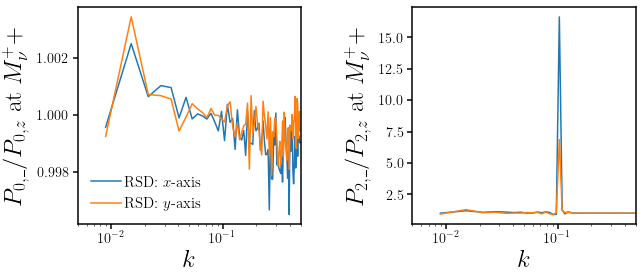

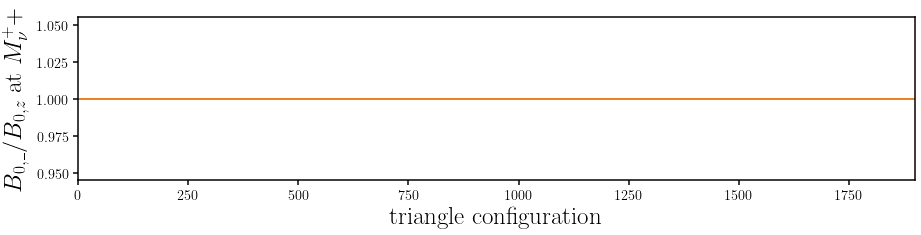

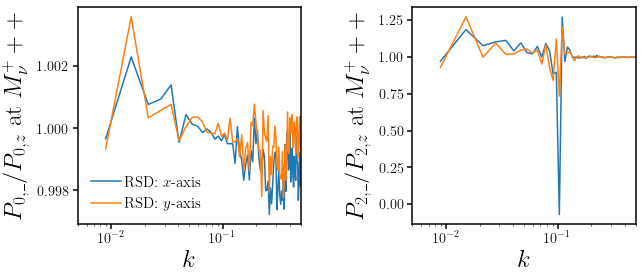

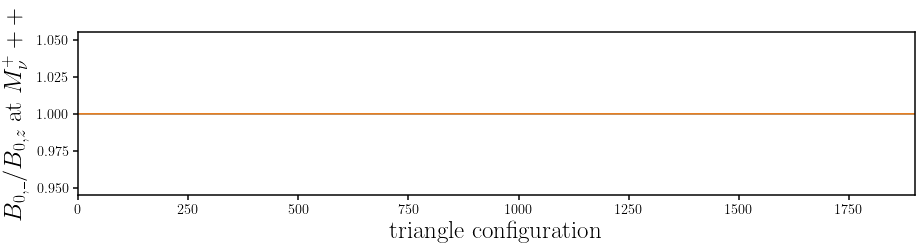

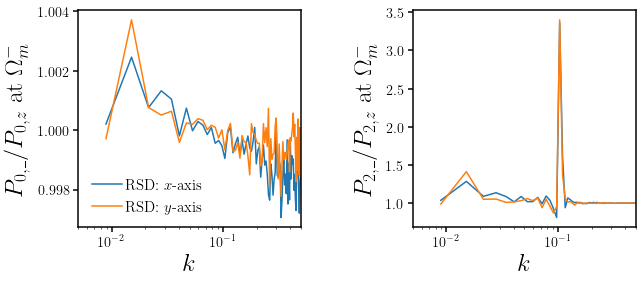

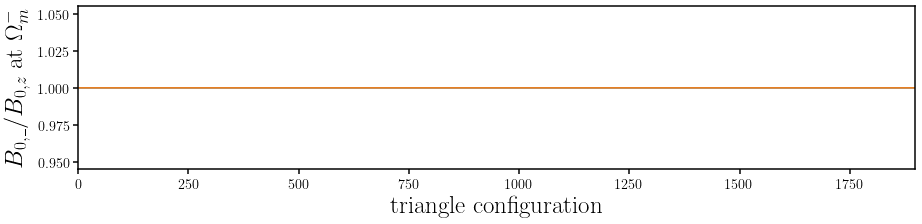

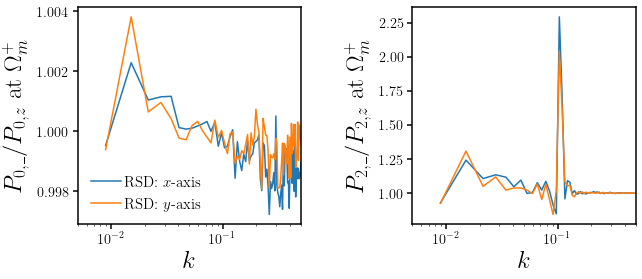

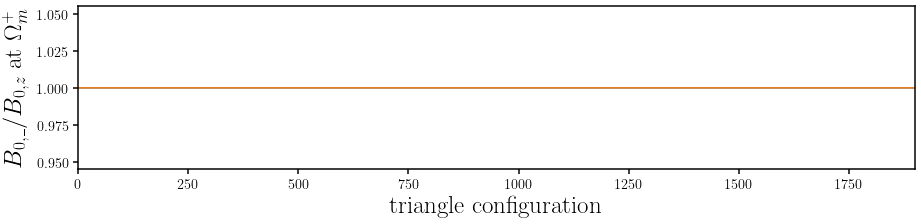

In [99]:
for tt, lbl in zip(['Mnu_pp', 'Mnu_ppp', 'Om_m', 'Om_p'], [r'$M_\nu^++$', r'$M_\nu^+++$', r'$\Omega_m^-$', r'$\Omega_m^+$']):
    fig0 = plt.figure(figsize=(10,4))
    fig0.subplots_adjust(wspace=0.5)
    fig1 = plt.figure(figsize=(15,3))
    sub0 = fig0.add_subplot(121)
    sub1 = fig0.add_subplot(122)
    sub2 = fig1.add_subplot(111)

    _qhod_0 = Obvs.quijhod_Pk(tt, flag='reg', rsd=0, silent=False) 
    _qhod_1 = Obvs.quijhod_Pk(tt, flag='reg', rsd=1, silent=False) 
    _qhod_2 = Obvs.quijhod_Pk(tt, flag='reg', rsd=2, silent=False) 
    p0g_0, p2g_0 = np.average(_qhod_0['p0k'], axis=0), np.average(_qhod_0['p2k'], axis=0)
    p0g_1, p2g_1 = np.average(_qhod_1['p0k'], axis=0), np.average(_qhod_1['p2k'], axis=0)
    p0g_2, p2g_2 = np.average(_qhod_2['p0k'], axis=0), np.average(_qhod_2['p2k'], axis=0)
    p0gs = [p0g_0, p0g_1, p0g_2]
    p2gs = [p2g_0, p2g_1, p2g_2]

    _qhod_0 = Obvs.quijhod_Bk(tt, flag='reg', rsd=0, silent=False) 
    _qhod_1 = Obvs.quijhod_Bk(tt, flag='reg', rsd=1, silent=False) 
    _qhod_2 = Obvs.quijhod_Bk(tt, flag='reg', rsd=2, silent=False) 
    b0g_0 = np.average(_qhod_0['b123'], axis=0)
    b0g_1 = np.average(_qhod_1['b123'], axis=0)
    b0g_2 = np.average(_qhod_2['b123'], axis=0)
    b0gs = [b0g_0, b0g_1, b0g_2]

    for rsd in [0, 1]: 
        sub0.plot(k_p[pklim], p0gs[rsd][pklim]/p0gs[2][pklim], c='C%i' % rsd, label='RSD: $%s$-axis' % ['x', 'y', 'z'][rsd])
        sub1.plot(k_p[pklim], p2gs[rsd][pklim]/p2gs[2][pklim], c='C%i' % rsd)
        sub2.plot(range(np.sum(bklim)), b0gs[rsd][bklim]/b0gs[2][bklim], c='C%i' % rsd)

    sub0.legend(loc='lower left', handletextpad=0.2, fontsize=15)
    sub0.set_xlabel('$k$', fontsize=25)
    sub0.set_xscale('log') 
    sub0.set_xlim(5e-3, 0.5)
    sub0.set_ylabel(r'$P_{0,\_}/P_{0,z}$ at %s' % lbl, fontsize=25)

    sub1.set_xlabel('$k$', fontsize=25)
    sub1.set_xscale('log') 
    sub1.set_xlim(5e-3, 0.5) 
    sub1.set_ylabel(r'$P_{2,\_}/P_{2,z}$ at %s' % lbl, fontsize=25)

    sub2.set_xlabel("triangle configuration", fontsize=25)
    sub2.set_xlim(0, np.sum(bklim))
    sub2.set_ylabel(r'$B_{0,\_}/B_{0,z}$ at %s' % lbl, fontsize=25)

In [98]:
all_thetas = ['fiducial', 'fiducial_za', 
              'Mnu_p', 'Mnu_pp', 'Mnu_ppp', 
              'Om_m', 'Om_p', 'Ob2_m', 'Ob2_p', 'h_m', 'h_p', 'ns_m', 'ns_p', 's8_m', 's8_p', 
              'alpha_m', 'alpha_p', 'logM0_m', 'logM0_p', 'logM1_m', 'logM1_p', 'logMmin_m', 'logMmin_p', 'sigma_logM_m', 'sigma_logM_p']

for theta in all_thetas: 
    qhod_b_0 = Obvs.quijhod_Bk(theta, flag='reg', rsd=0, silent=True) 
    qhod_b_1 = Obvs.quijhod_Bk(theta, flag='reg', rsd=1, silent=True) 
    #qhod_b_2 = Obvs.quijhod_Bk(theta, flag='reg', rsd=2, silent=False) 
    
    notsame = (np.abs(np.sum(qhod_b_0['b123']  - qhod_b_1['b123'], axis=1)) != 0)
    print('--- %s; %i ---' % (theta, np.sum(notsame)))

--- fiducial; 61 ---
--- fiducial_za; 500 ---
--- Mnu_p; 0 ---
--- Mnu_pp; 0 ---
--- Mnu_ppp; 0 ---
--- Om_m; 0 ---
--- Om_p; 0 ---
--- Ob2_m; 0 ---
--- Ob2_p; 0 ---
--- h_m; 0 ---
--- h_p; 0 ---
--- ns_m; 0 ---
--- ns_p; 0 ---
--- s8_m; 0 ---
--- s8_p; 0 ---
--- alpha_m; 0 ---
--- alpha_p; 0 ---
--- logM0_m; 0 ---
--- logM0_p; 0 ---
--- logM1_m; 0 ---
--- logM1_p; 0 ---
--- logMmin_m; 0 ---
--- logMmin_p; 0 ---
--- sigma_logM_m; 0 ---
--- sigma_logM_p; 0 ---
